# EEG Data Analysis as Fourier Series

## Table of Contents
- Practical Motivation 
- Data Preparation
- Exploratory Analysis 
- Observations

## Practical Motivation

> Real Life Problem: Can we detect epilepsy?

> Data Science Problem: What is the best model to classify epilepsy?
    > - What metrics should be used to determine the best model?

In order to best detect epilepsy given EEG seizure data, we chose **four** different models and ranked them in terms of 
**classification accuracy** and **false negative rate**. These metrics were chosen in order to 
<br />**1. determine which model made the most correct predictions**, and 
<br />**2. see which model best minimized the cases where a seizure went undetected.**

In [121]:
# import necessary libraries
from numpy import array

import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Data Preparation

In [122]:
#Insert data from csv file
df = pd.read_csv('data_ftt.csv')
df.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,y
0,3010.0,2487.874510,3042.670412,4575.540392,2968.235055,918.227021,652.030611,825.916491,1896.711337,1315.552672,...,1315.552672,1896.711337,825.916491,652.030611,918.227021,2968.235055,4575.540392,3042.670412,2487.874510,0
1,5004.0,7519.125524,16627.178261,31208.375473,22005.586446,17737.282651,6466.805002,16606.376540,17263.041626,6065.217440,...,6065.217440,17263.041626,16606.376540,6466.805002,17737.282651,22005.586446,31208.375473,16627.178261,7519.125524,1
2,7840.0,1148.524936,2400.247875,1338.690640,1356.274600,1271.831669,871.045139,1313.823920,1628.227864,1380.181087,...,1380.181087,1628.227864,1313.823920,871.045139,1271.831669,1356.274600,1338.690640,2400.247875,1148.524936,0
3,12266.0,654.630444,617.868310,527.325447,478.143526,157.997898,176.298853,629.846337,97.879412,423.160998,...,423.160998,97.879412,629.846337,176.298853,157.997898,478.143526,527.325447,617.868310,654.630444,0
4,1184.0,2595.209155,728.397261,1141.155591,730.139183,1019.432565,488.478147,500.453402,621.851542,952.974618,...,952.974618,621.851542,500.453402,488.478147,1019.432565,730.139183,1141.155591,728.397261,2595.209155,0


In [123]:
print(df.dtypes)

0.0     float64
1.0     float64
2.0     float64
3.0     float64
4.0     float64
         ...   
-4.0    float64
-3.0    float64
-2.0    float64
-1.0    float64
y         int64
Length: 179, dtype: object


- The time series data was converted into the freqency domain using numpy.ftt
- The columns names was changed from X1,X2... to the freq 

In [124]:
#Data epilepsy and no epilepsy
data_epilepsy = (df.loc[df['y'] == 1]).drop(['y'],axis=1)
data_no_epilepsy = (df.loc[df['y'] != 1]).drop(['y'],axis=1)

## Exploratory Analysis
- Observe trends between epilepsy and non-epilepsy data

### Statistical description of epilepsy data


In [125]:
data_epilepsy.describe()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,5406.809565,6053.039481,7899.316553,8013.394752,9000.567191,10166.671481,10718.796864,9012.707186,7013.142139,5809.834961,...,5784.419556,5809.834961,7013.142139,9012.707186,10718.796864,10166.671481,9000.567191,8013.394752,7899.316553,6053.039481
std,4415.359592,5579.040011,7295.378420,7265.503839,8538.561306,9295.529050,9408.735877,8591.581083,5559.354780,4872.204506,...,5029.244788,4872.204506,5559.354780,8591.581083,9408.735877,9295.529050,8538.561306,7265.503839,7295.378420,5579.040011
min,2.000000,90.657870,94.744599,49.432594,25.967406,75.057388,135.391609,41.918398,82.167814,82.155302,...,83.921218,82.155302,82.167814,41.918398,135.391609,75.057388,25.967406,49.432594,94.744599,90.657870
25%,2020.500000,2389.598926,2962.350946,2983.672373,2967.351690,3466.081052,4139.169294,3353.258032,2965.601684,2344.384041,...,2265.335008,2344.384041,2965.601684,3353.258032,4139.169294,3466.081052,2967.351690,2983.672373,2962.350946,2389.598926
50%,4360.000000,4297.311611,5769.151941,5669.206025,5999.690366,7041.902834,8023.946573,6418.735099,5405.571589,4354.850411,...,4184.200227,4354.850411,5405.571589,6418.735099,8023.946573,7041.902834,5999.690366,5669.206025,5769.151941,4297.311611
75%,7706.750000,7716.765057,10244.384317,10394.663409,12438.302840,13839.541855,14415.434808,11873.279449,9519.839791,7907.612849,...,7652.738972,7907.612849,9519.839791,11873.279449,14415.434808,13839.541855,12438.302840,10394.663409,10244.384317,7716.765057
max,42648.000000,56414.821273,50135.851678,51293.966583,65105.917827,60799.602107,65554.573151,65336.222086,46316.246465,34582.313966,...,39871.484177,34582.313966,46316.246465,65336.222086,65554.573151,60799.602107,65105.917827,51293.966583,50135.851678,56414.821273


### Statistical description of non-epilepsy data


In [126]:
data_no_epilepsy.describe()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0
count,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,...,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000
mean,4152.969891,2514.377441,2045.668879,1663.288772,1390.714360,1289.779008,1151.697739,1100.671316,1102.809679,1023.732670,...,1095.299532,1023.732670,1102.809679,1100.671316,1151.697739,1289.779008,1390.714360,1663.288772,2045.668879,2514.377441
std,3914.075723,2786.601548,2148.065104,1692.080167,1401.950762,1144.067147,1002.309469,931.230442,946.954870,914.715466,...,1106.176582,914.715466,946.954870,931.230442,1002.309469,1144.067147,1401.950762,1692.080167,2148.065104,2786.601548
min,1.000000,18.304446,22.985456,19.331201,4.042379,6.959811,6.442206,2.683289,6.058854,19.461771,...,6.411294,19.461771,6.058854,2.683289,6.442206,6.959811,4.042379,19.331201,22.985456,18.304446
25%,1306.000000,1122.449799,909.852415,741.169470,650.120467,628.832390,577.758245,539.940647,516.633501,452.076064,...,423.779086,452.076064,516.633501,539.940647,577.758245,628.832390,650.120467,741.169470,909.852415,1122.449799
50%,2909.000000,1859.965197,1508.617429,1245.901361,1065.401510,1039.733679,946.265788,899.839804,876.318528,784.525705,...,771.115075,784.525705,876.318528,899.839804,946.265788,1039.733679,1065.401510,1245.901361,1508.617429,1859.965197
75%,5887.000000,3043.052914,2450.772003,2036.961261,1690.627372,1619.706665,1464.016202,1391.377997,1404.046154,1297.251420,...,1349.440144,1297.251420,1404.046154,1391.377997,1464.016202,1619.706665,1690.627372,2036.961261,2450.772003,3043.052914
max,43820.000000,47653.848509,36606.158019,29301.229686,30077.680970,18305.057768,20470.489580,17549.271008,17237.697978,11844.653590,...,13800.956551,11844.653590,17237.697978,17549.271008,20470.489580,18305.057768,30077.680970,29301.229686,36606.158019,47653.848509


### Visualisation of epilepsy data

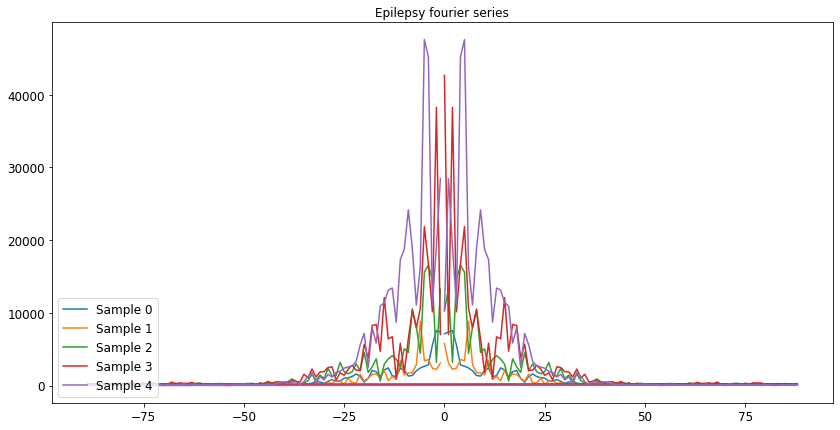

In [127]:
#fourier series plot 5 random epilepsy data
ran_ep = data_epilepsy.sample(n = 5)
freq = np.fft.fftfreq(ran_ep.shape[-1])*178
plt.figure(figsize=(14, 7))

for i in range(len(ran_ep)):
    plt.plot(freq,ran_ep.iloc[i][:178],label='Sample '+str(i))
plt.title('Epilepsy fourier series')
plt.tick_params(labelsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.show()

### Visualisation of non-epilepsy data

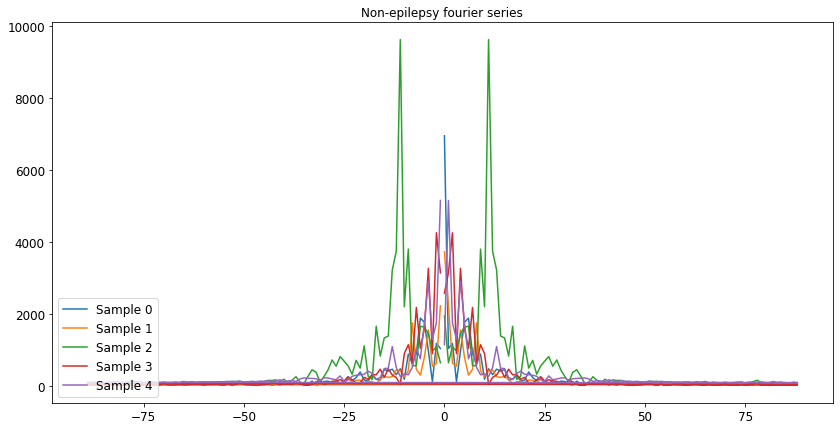

In [128]:
#fourier series plot 5 random epilepsy data

ran_no_ep = data_no_epilepsy.sample(n = 5)
freq = np.fft.fftfreq(ran_no_ep.shape[-1])*178

plt.figure(figsize=(14, 7))

for i in range(len(ran_no_ep)):
    plt.plot(freq,ran_no_ep.iloc[i][:178],label='Sample '+str(i))
    
plt.title('Non-epilepsy fourier series')
plt.tick_params(labelsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.show()

### Visualisation of epilepsy vs non-epilepsy data


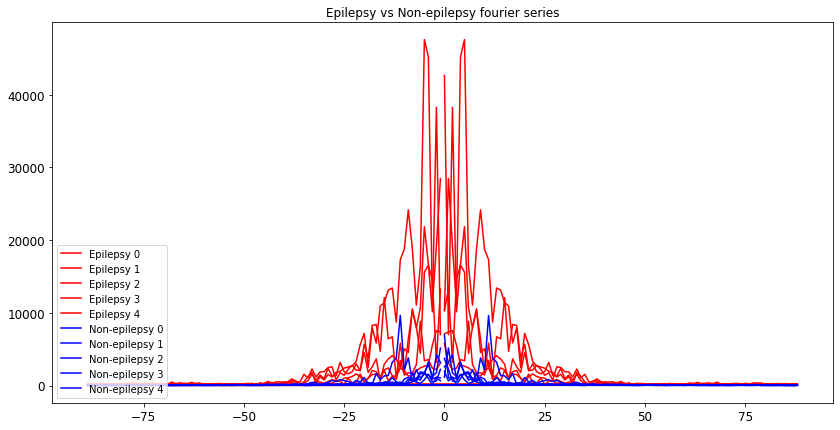

In [129]:
plt.figure(figsize=(14, 7))

for i in range(len(ran_ep)):
    plt.plot(freq,ran_ep.iloc[i][:178],label='Epilepsy '+str(i),color='red')
for i in range(len(ran_no_ep)):
    plt.plot(freq,ran_no_ep.iloc[i][:178],label='Non-epilepsy '+str(i),color='blue')
    
plt.title('Epilepsy vs Non-epilepsy fourier series')
plt.tick_params(labelsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.show()

> Observations: 
> - Magnitude of epilepsy is higher compared to non-epliepsy
> - There are more spikes in the epilepsy data

### Getting the brain wave freq from the freq coefficient
- The brain waves are divided into 5 main bandwiths
- Delta Waves (0.5 to 3 Hz)
- Theta Waves (3 to 8 Hz)
- Alpha Waves (8 to 12 Hz)
- Beta Waves (12 to 38 Hz)
- Gamma Waves (38 to 42 hz)

In [130]:
#Function to convert the freq to the five wave
#Get the average value of the freq maginitude at their respective bandwith
def convertToWave(dataFrame):
    waveData = pd.DataFrame()
    deltaWave = dataFrame.iloc[:,0:4]
    waveData['DeltaWave']= avg(deltaWave)
    thetaWave = dataFrame.iloc[:,4:9]
    waveData['ThetaWave']= avg(thetaWave)
    alphaWave = dataFrame.iloc[:,9:13] 
    waveData['AlphaWave']= avg(alphaWave)
    betaWave = dataFrame.iloc[:,13:39]
    waveData['BetaWave']= avg(betaWave)
    gammaWave = dataFrame.iloc[:,39:43]
    waveData['GammaWave']= avg(gammaWave)
    return waveData

def avg(var):
    count = 0
    result = 0
    for x in var.columns:
        result += var[x]
        count += 1
    return result/count

### Visualisation of the five waves in non-epilepsy

,DeltaWave,ThetaWave,AlphaWave,BetaWave,GammaWave
count,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000
mean,2594.076246,1207.134420,1101.257063,338.043990,87.992626
std,1900.827482,871.988381,949.910593,207.612192,69.553244
min,212.748922,200.243553,70.584560,50.510932,6.737727
25%,1492.624074,773.498846,513.649799,180.434352,46.306261
50%,2204.844592,1034.346008,827.985602,305.709518,70.573612
75%,3242.442946,1401.949535,1316.427299,444.365339,108.833895
max,30179.742592,16086.291166,9158.205934,2858.045691,1490.611771


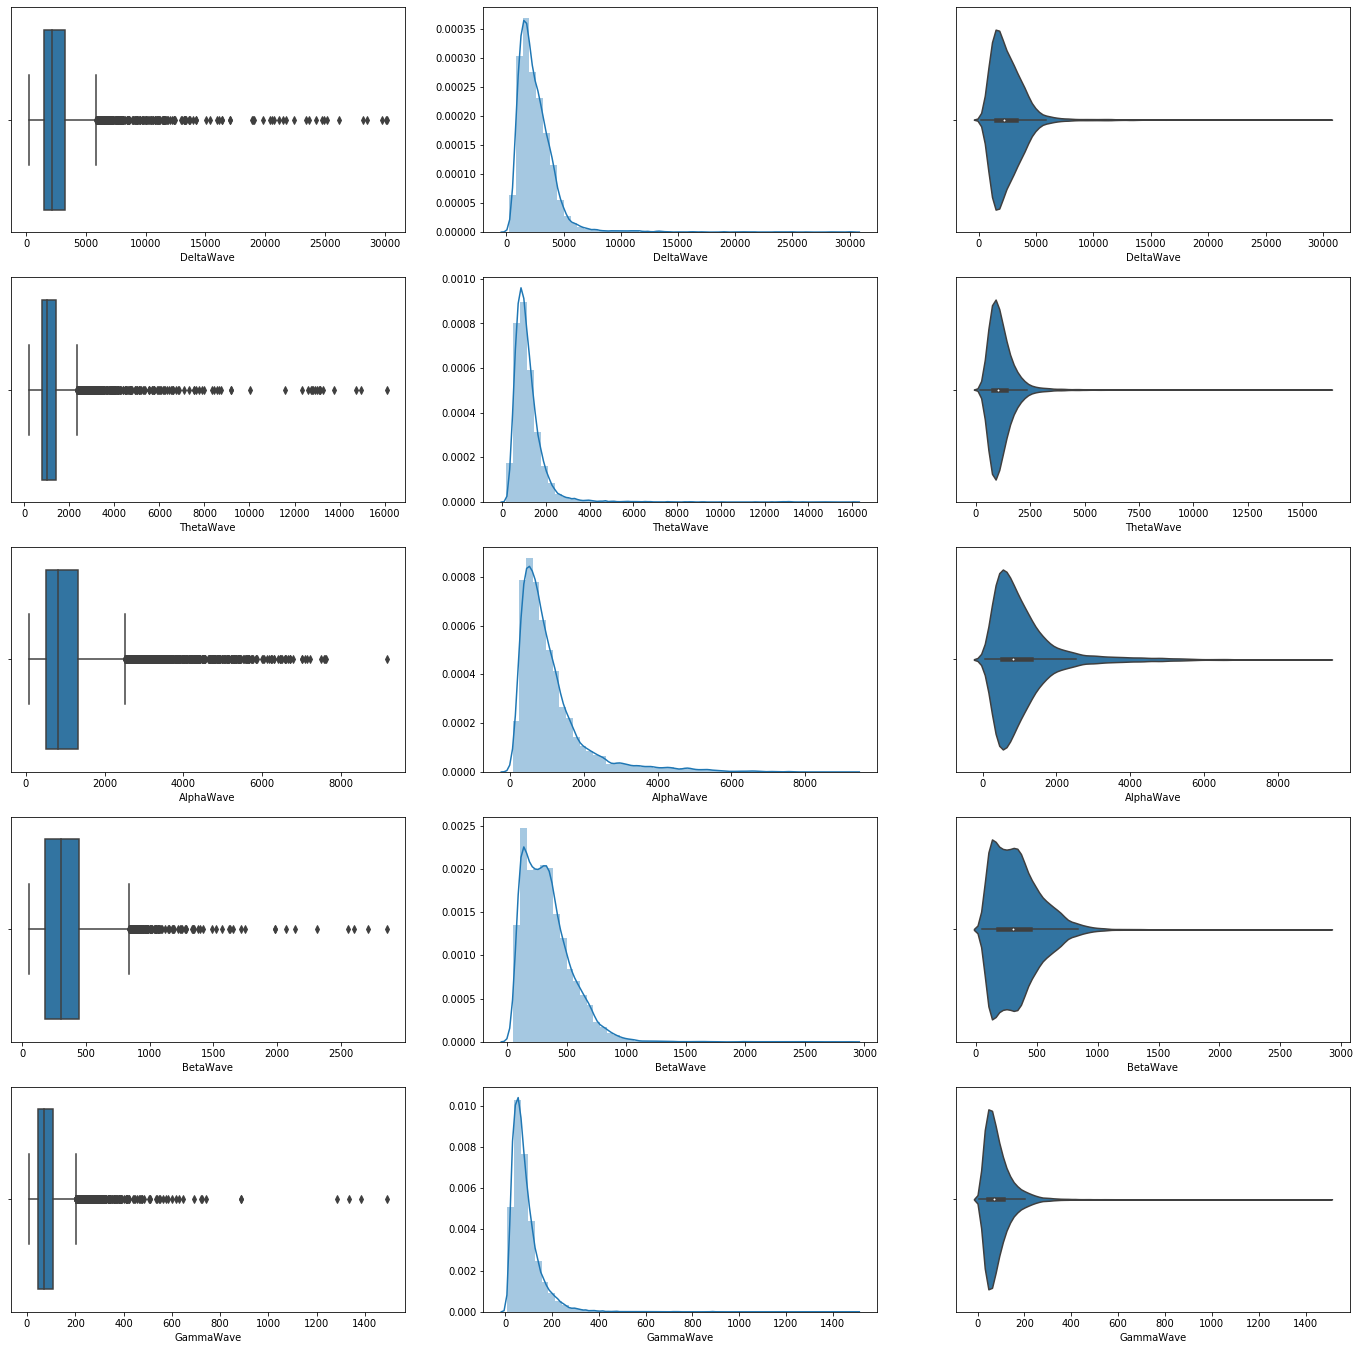

In [131]:
noEpilepsyFreq = convertToWave(data_no_epilepsy)
#Statisical distribution for each of the predictor variables

f, axes = plt.subplots(5, 3, figsize=(24, 24))
count = 0
for var in noEpilepsyFreq:
    sb.boxplot(noEpilepsyFreq[var], ax = axes[count,0])
    sb.distplot(noEpilepsyFreq[var], ax = axes[count,1])
    sb.violinplot(noEpilepsyFreq[var], ax = axes[count,2])
    count += 1
    
noEpilepsyFreq.describe()

> Observations: 
> - From the plot, the histograph is right skewed.
> - There is very little annomalies within the graphs

### Visualisation of the five waves in epilepsy

,DeltaWave,ThetaWave,AlphaWave,BetaWave,GammaWave
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,6843.140088,9182.376972,5987.878274,2383.523393,434.853742
std,4349.466462,5290.360144,3841.602548,1790.923007,334.271994
min,644.452446,867.874485,410.305018,275.536282,17.053339
25%,3764.145988,4588.907737,3013.073470,1044.020065,194.786476
50%,5702.712511,8707.966633,4991.017831,1795.003958,335.402460
75%,8822.471740,12376.300672,7989.331678,3204.971367,576.071075
max,35083.465840,35370.323074,22128.367221,10116.796530,2579.514018


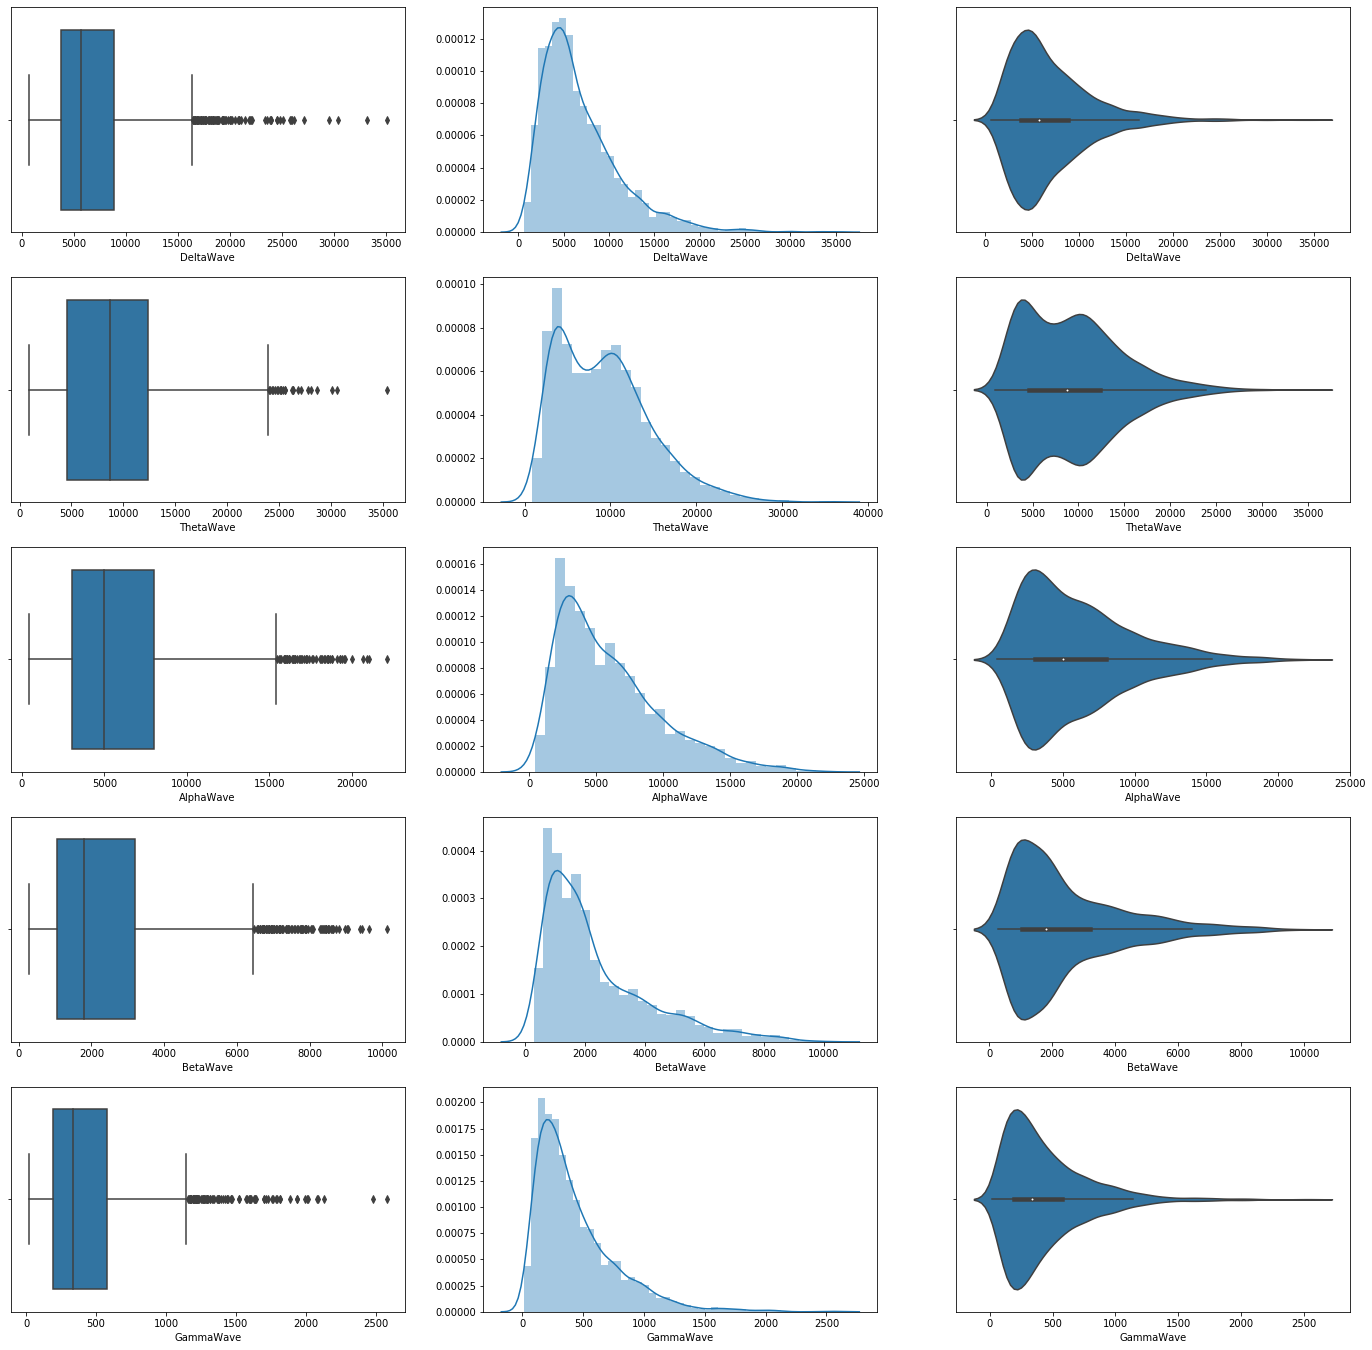

In [132]:
epilepsyFreq = convertToWave(data_epilepsy)
#Statisical distribution for each of the predictor variables

f, axes = plt.subplots(5, 3, figsize=(24, 24))
count = 0
for var in epilepsyFreq:
    sb.boxplot(epilepsyFreq[var], ax = axes[count,0])
    sb.distplot(epilepsyFreq[var], ax = axes[count,1])
    sb.violinplot(epilepsyFreq[var], ax = axes[count,2])
    count += 1
    
epilepsyFreq.describe()

> Observations: 
> - From the plot, the histograph is slighly right skewed.
> - Most of the data in the epliepsy data set above the outier value(IQR*Q3) of the non-epliepsy data set

### Count of y(Epilepsy vs Non-Epilepsy)
> Observations: Data is unbalanced - will effect outcome of classification models (this will be addressed later).

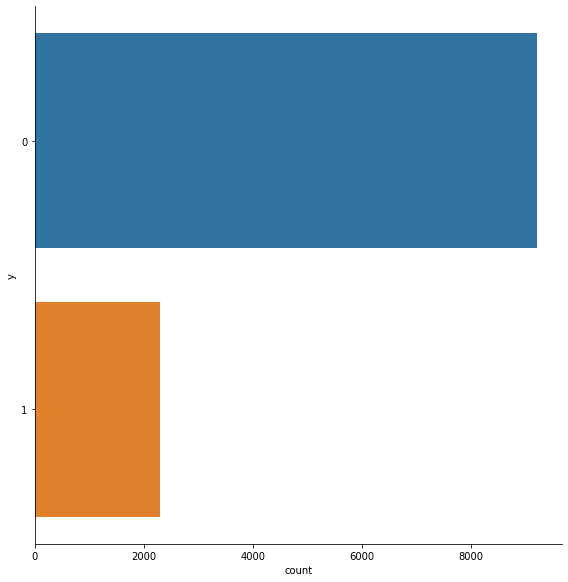

In [133]:
sb.catplot(y = 'y', data = df, kind = "count", height = 8)

In [134]:
#Print the ratio
import math
ratio = df['y'].value_counts()
true = ratio.iloc[1]
false = ratio.iloc[0]
gcd = math.gcd(true,false)
print("The ratio of Epilepsy:Non-epilepsy is %.2f : %.2f"%(true/gcd,false/gcd))

The ratio of Epilepsy:Non-epilepsy is 1.00 : 4.00


## Balancing the dataset
- The dataset is unbalanced: ratio of response variable to predictors is 1:4. 
- Using SMOTE, oversample the data to create a balanced dataset.
    - This will be done on the train set.

In [135]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [136]:
#seperate data into test and train
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
X = df.drop(['y'],axis=1)
# Convert the freq coeff into its 5 freq bandwith
X = convertToWave(X)

y = pd.DataFrame(df['y'])
y = np.array(y).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20) # create train and test set based on the anomaly table


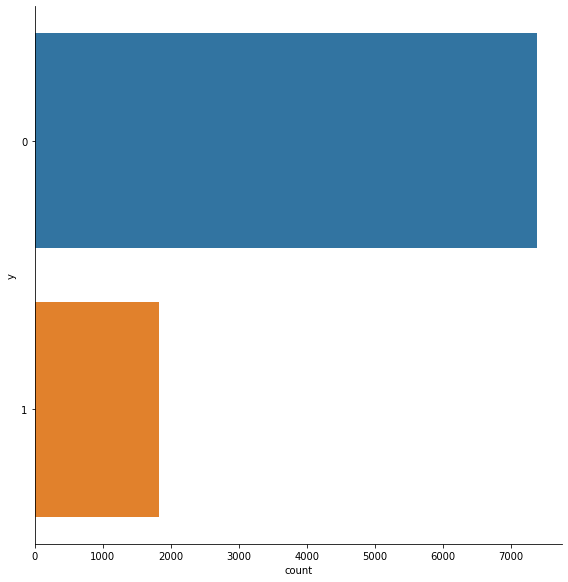

In [137]:
sb.catplot(y = 'y', data = pd.DataFrame(y_train, columns=["y"]), kind = "count", height = 8)

- Dataset is very unbalanced.
- Balance the dataset using Synthetic Minority Over-sampling Technique (SMOTE)
    - This method will return a dataset comprised of the original points as well as additional synthetic minority samples.

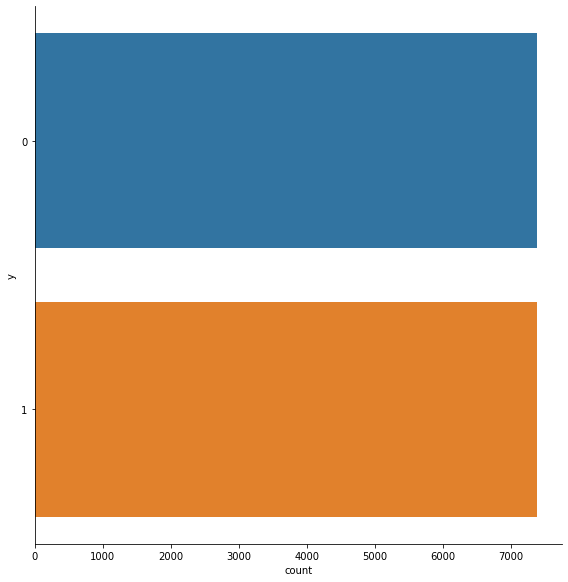

In [138]:
X_train,y_train = sm.fit_sample(X_train,y_train) # balancing the dataset
sb.catplot(y = 'y', data = pd.DataFrame(y_train, columns=["y"]), kind = "count", height = 8)

 - After appling SMOTE, dataset is now balanced equally between y 0 and 1.

# Methods of Analysis
> As per the problem, four methods of classification were chosen. These are:
> - Anomaly Detection
> - Logistic Regression
> - Gradient Boosting
> - K-Nearest Neighbors
>
> In order to determine which method is the best, two metrics were identified: **Classification Accuracy** and **False Negative Rate**.
> - Classification Accuracy - in order to determine how well the method can classify epilepsy and non epilepsy.
> - False Negative Rate - the method should minimize the amount of undetected epilepsy (1's identified as 0)

### Anomaly detection
- From the data visualisation above, we can see that most of the epliepsy data is higher than the upper outlier of each respective badnwith
- Using the boxplot we can see how non-epliepsy data looks like
- we will use the outliers value of the non-epliepsy data set to predict epliepsy
- if there are more than or equal to 2 outiers in the data, we predict that data to be an epliepsy data

In [139]:
# Function for calculating the FNR
def fnr_rate(y_train,y_test,y_train_pred,y_test_pred):
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train,y_train_pred).ravel() # extract TN, FP, FN, TP from train set
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_test_pred).ravel() # extract from test set
    fnr_train = fn1/(fn1+tp1)
    fnr_test = fn2/(fn2+tp2)
    return fnr_train, fnr_test # return the FNR for train and test set

In [140]:
# Function for calculating the accuracy
def acc(y_train,y_test,y_train_pred,y_test_pred):
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train,y_train_pred).ravel() # extract TN, FP, FN, TP from train set
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_test_pred).ravel() # extract from test set
    acc_train = (tp1+tn1)/(tp1+tn1+fp1+fn1)
    acc_test = (tp2+tn2)/(tp2+tn2+fp2+fn2)
    return acc_train, acc_test # return the FNR for train and test set

In [141]:
# Function for calculating the upper and lower bounds
def getOutliervalue(var):
    iqr = var.quantile(0.75)-var.quantile(0.25)
    upp = (var.quantile(0.75)+1.5*iqr).values
    low = (var.quantile(0.25)-1.5*iqr).values
    return upp,low

In [142]:
# Function for storing the bounds of each wave into a list
def Outliers(data):
    outlierBounds = []
    for var in data.columns:
        values = pd.DataFrame(data[var])
        upp,low = getOutliervalue(values)
        outlierBounds.append([upp,low])

    return outlierBounds

In [143]:
# Function to predict epliepsy using anomaly detection
def predictEpilepsy(Xdata,boundary):
    predict = []
    for i in range(len(Xdata)):
        result = 0
        for j in range(len(Xdata.columns)-1):
            if(Xdata.iloc[i][j]>boundary[j][0]):
                result += 1
        if(result>=2):
            result = 1
        else:
            result = 0
        predict.append(result)
    return predict

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9375339120998373
False Negative Rate 		: 0.09820944112859468

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9578260869565217
False Negative Rate	 	: 0.09322033898305085



(2.0, 0.0)

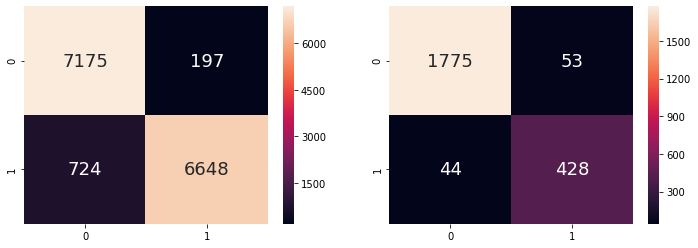

In [144]:
train_data = pd.concat([X_train,  pd.DataFrame(y_train, columns=["y"])], axis=1)
train_data_no_epliepsy = (train_data.loc[train_data['y'] != 1]).drop(['y'],axis=1)

bounds = Outliers(train_data_no_epliepsy)

# predict epilepsy for train and test sets
y_train_pred = predictEpilepsy(X_train,bounds)
y_test_pred = predictEpilepsy(X_test,bounds)

ad_fnr_train,ad_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)
ad_acc_train,ad_acc_test = acc(y_train,y_test,y_train_pred,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", ad_acc_train)
print("False Negative Rate \t\t:", ad_fnr_train)
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", ad_acc_test)
print("False Negative Rate\t \t:", ad_fnr_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Machine Learning


## Logistic Regression

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9666983179598481
False Negative Rate     	: 0.041101465002712965

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9743478260869565
False Negative Rate     	: 0.029661016949152543



(2.0, 0.0)

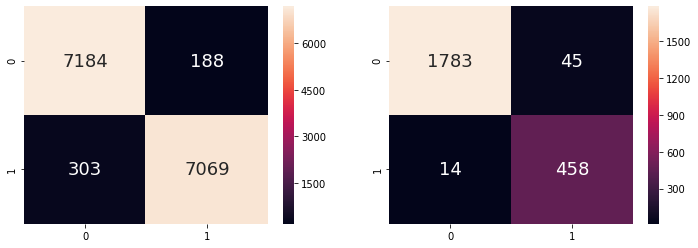

In [145]:
from sklearn.linear_model import LogisticRegression


# Train the model
lr = LogisticRegression(random_state = 69)
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_fnr_train,lr_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr.score(X_train, y_train))
print("False Negative Rate     \t:",lr_fnr_train)

print()

lr_acc = lr.score(X_test, y_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:",lr_acc)
print("False Negative Rate     \t:",lr_fnr_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Gradient Boosting Classifier

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9850108518719479
False Negative Rate     	: 0.01342919153553988

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9804347826086957
False Negative Rate     	: 0.012711864406779662



(2.0, 0.0)

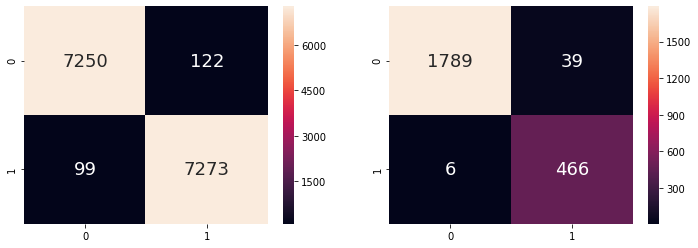

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3)
gbc.fit(X_train, y_train)

y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

gbc_fnr_train,gbc_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gbc.score(X_train, y_train))
print("False Negative Rate     \t:",gbc_fnr_train )
print()

gbc_acc =gbc.score(X_test, y_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gbc_acc)
print("False Negative Rate     \t:",gbc_fnr_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


## K-Nearest Neighbours

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9707677699403147
False Negative Rate     	: 0.023738469886055345

Goodness of Fit of Model 	Test Dataset
Classification Accuracy  	: 0.9660869565217391
False Negative Rate      	: 0.01694915254237288



(2.0, 0.0)

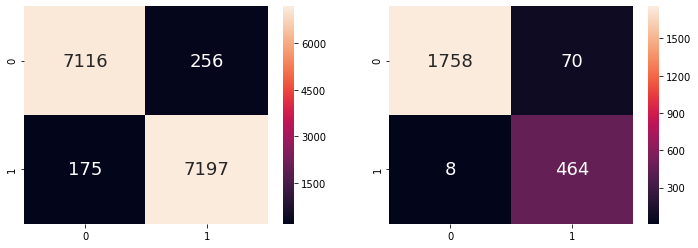

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

y_train_preds = knn.predict_proba(X_train)[:,1]

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn_fnr_train,knn_fnr_test = fnr_rate(y_train,y_test,y_train_pred,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", knn.score(X_train, y_train))
print("False Negative Rate     \t:", knn_fnr_train)
print()

knn_acc = knn.score(X_test, y_test)

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy  \t:", knn_acc )
print("False Negative Rate      \t:", knn_fnr_test )
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax = sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


### Comparing the models

In [148]:
df_results = pd.DataFrame({'Model':['LRM','GBC','KNN','AD'],'Acc':[lr_acc,gbc_acc,knn_acc,ad_acc_test],'FNR':[lr_fnr_test,gbc_fnr_test,knn_fnr_test,ad_fnr_test]})
df_results.head()

,Model,Acc,FNR
0,LRM,0.974348,0.029661
1,GBC,0.980435,0.012712
2,KNN,0.966087,0.016949
3,AD,0.957826,0.093220


### Visualising the results

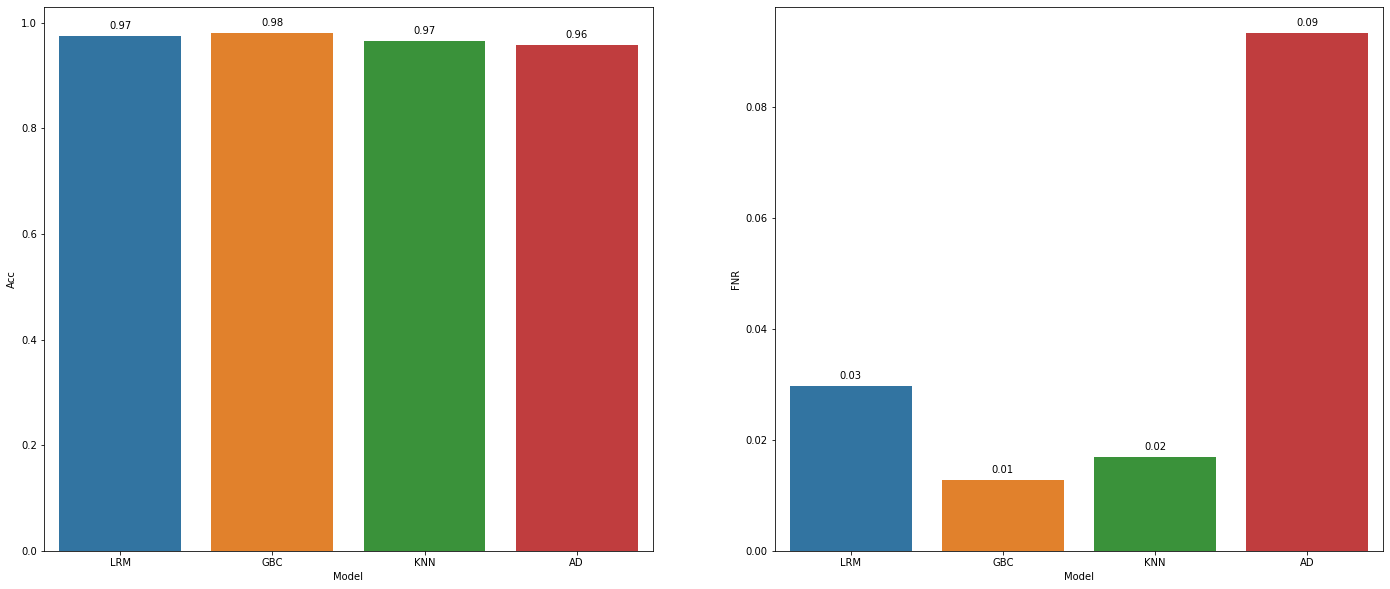

In [149]:
f, axes = plt.subplots(1, 2, figsize=(24, 10))
g = sb.barplot(x = 'Model', y = 'Acc', data = df_results,ax =axes[0])
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

g = sb.barplot(x = 'Model', y = 'FNR', data = df_results,ax =axes[1])
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Observations

- All the models using fourier series has a better accuracy and lower FNR compared to its time series counterpart
- We decided to choose GBC as the best model, despite having a lower accuracy than LRM. The FNR is lower than FNR by about 50%
- In conclusion, by converting the time series data into the freq domain and then to the different bandwith, we are able to obtain higher accuracy and lower FNR 